In [ ]:
# Fuel consumption assignment

# *Problem Stastement:* Ability to model and predict the fuel consumption is vital in enhancing fuel economy of vehicles
#  and preventing fraudulent activities in fleet management. Fuel consumption of a vehicle depends on several internal 
#  factors such as distance, load, vehicle characteristics, and driver behavior, as well as external factors such as 
# road conditions,traffic, and weather. However, not all these factors may be measured or available for the fuel 
#  consumption analysis. We consider a case where only a subset of the aforementioned factors is available as 
# a multi-variate time series from a long distance,public bus. Hence, the challenge is to model and/or predict 
# the fuel consumption only with the available data, while still indirectly capturing as much as influences from 
# other internal and external factors. Machine Learning (ML) 
#  is suitable in such analysis, as the model can be developed by learning the patterns in data.*


### Things to do in assignment:
# * Data Loading
# * EDA
# * Seprating the Feature(X/input/indpendent) and Target(Y/Output/Dependending)
# * Model Selection for Train and Testing process Splitting the Data in to 75% For Train and 25% Testing
# * Apply the linear Regression Model
# * Fit the Model
# * New_predication
# * Comparing the Actual Data and New predication and find the Error
# * Find the Train Score and Test Score
# * Final Find the Overall Error in the data

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv")

In [51]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [52]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [5]:
df.shape

(1067, 13)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [54]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [55]:
# Correaltion
pearsoncorr = df.corr(method='pearson')

In [10]:
pearsoncorr

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


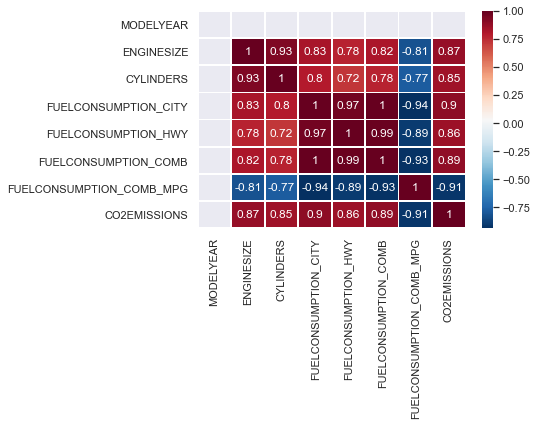

In [56]:
sns.heatmap(pearsoncorr,
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.8)

In [12]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [57]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [58]:
pearsoncorr = df.corr(method='pearson')

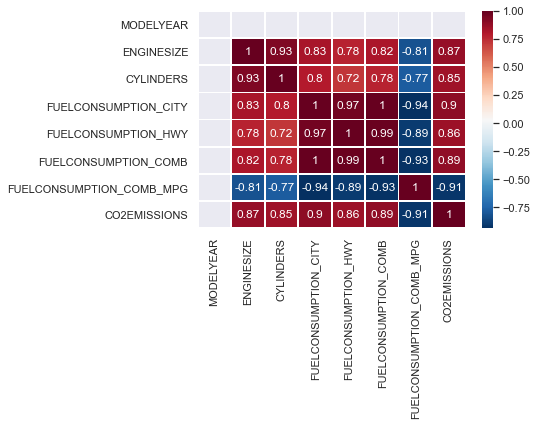

In [59]:
sns.heatmap(pearsoncorr,
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.8)

In [ ]:
#FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', have strong co relation(co relation coefficient
# is 1 and .99),Hence drop FUELCONSUMPTION_HWY and check the co relation again

In [60]:
df = df.drop(['FUELCONSUMPTION_HWY'] , axis=1)
df = df.drop(['FUELCONSUMPTION_COMB'] , axis=1)

In [61]:
pearsoncorr = df.corr(method='pearson')

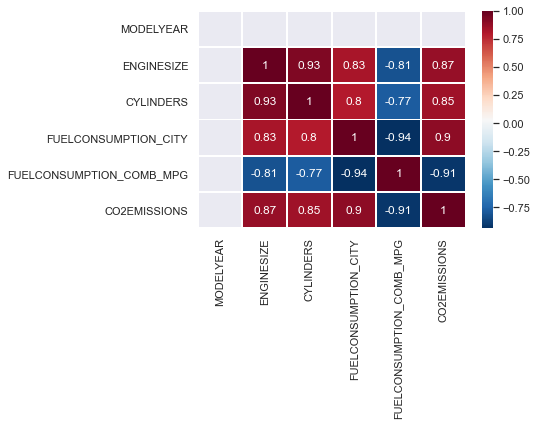

In [62]:
sns.heatmap(pearsoncorr,
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.8)

In [ ]:
# 'ENGINESIZE', and 'CYLINDERS' have strong correlation 0f .93. Hence drop off one of the column

In [63]:
df = df.drop(['CYLINDERS'] , axis=1)

In [64]:
pearsoncorr = df.corr(method='pearson')

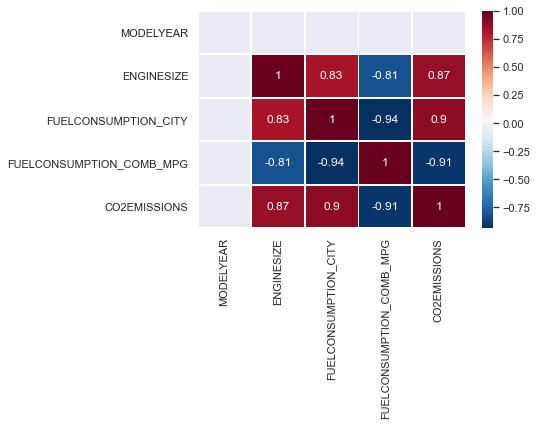

In [65]:
sns.heatmap(pearsoncorr,
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.8)

C:\Users\anand\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


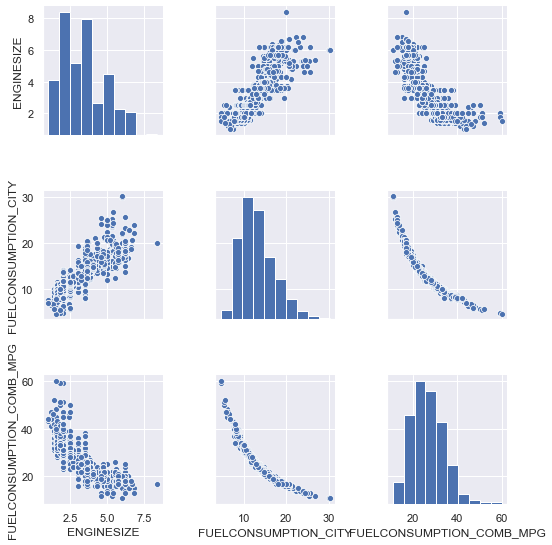

In [66]:
sns.set()
cols = ['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB_MPG']
sns.pairplot(df[cols], size=2.5)
plt.show()

In [67]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [69]:
# ENGINESIZE', 'FUELCONSUMPTION_CITY' have strong co relation (0.83) hence drop one of the column
df = df.drop(['FUELCONSUMPTION_CITY'], axis=1)

In [70]:
pearsoncorr = df.corr(method='pearson')

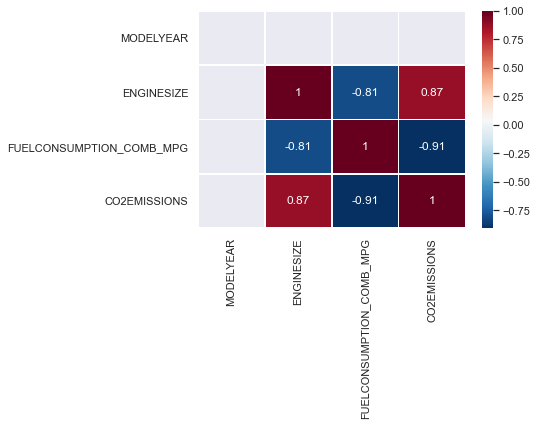

In [71]:
sns.heatmap(pearsoncorr,
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.8)

In [72]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()

In [73]:
X = df["ENGINESIZE"].values.reshape(-1, 1)
y = df["CO2EMISSIONS"]

In [74]:
model.fit(X, y)

LinearRegression()

In [75]:
model.score(X, y)

0.7641458597854816

In [76]:
y_pred = model.predict(X)

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

946.314052718875

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [82]:
model.fit(X_train, y_train)

LinearRegression()

In [83]:
predictions = model.predict(X_test)

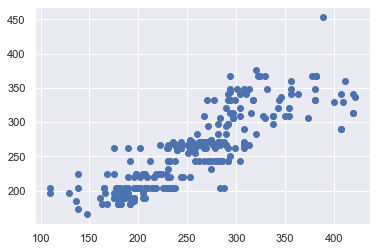

In [84]:
plt.scatter(y_test, predictions)

In [85]:
from sklearn import metrics

In [86]:
metrics.mean_squared_error(y_test, predictions)

1169.0430083864771